----
# Basic Plotting with matplotlib
----

##Matplotlib Architecture
[Matplotlib](https://matplotlib.org/api/) is a powerful open source toolkit for representing and visualizing data. Its creator, John Hunter, was heavily inspired by the MATLAB programming environment and borrows many of these elements.

Matplotlib can be a bit confusing to learn from web resources. There's a traditional object-oriented API, but there's also a MATLAB-like scripting model. I've also found that it's not always clear why a given script from a blog post might work or not work.

I'm going to try and demystify this a bit for you by providing a structured introduction to the architecture layers behind the matplotlib toolkit.

Matplotlib is a widely used python data visualization library. It provides many different kinds of 2D and 3D plots that are very useful for data analysis and machine learning tasks. It offers flexibility, as you will find that there are multiple ways to create plots. In order to master matplotlib, it is necessary to have a thorough understanding of its structure.

Matplotlib's architecture consists of 3 main layers:

![matplotlib_layers](https://drive.google.com/uc?id=1ZO3oQTWkW_SuSfS004lw2LNoIzxZZwXt)


##Backend Layer

If you’re not a develepor, you’re not likely to use or deal with the backend layer. 

It has three abstract classes:

*  **FigureCanvas:** Defines the area on which the figure is drawn.
*  **Renderer:** It is the tool to draw on FigureCanvas.
*  **Event:** Handles user inputs such as keybord strokes and mouse clicks.

Let's explain them in layman terms. Consider you want to draw a painting. You get a blank paper (FigureCanvas) and a brush (Renderer). You ask your friend what to draw (Event).

Matplotlib targets many different use cases and output formats. Some people use matplotlib interactively from the python shell and have plotting windows pop up when they type commands. Some people embed matplotlib into graphical user interfaces like wxpython or pygtk to build rich applications. Others use matplotlib in batch scripts to generate postscript images from some numerical simulations, and some use them in web application servers to dynamically serve up graphs.

### Backend Layer in Jypyter Notebook

One cool feature of Jupyter Notebook is that it has some specialized support for `matplotlib` that can be enabled using the IPython magic function `%matplotlib`. Remember that in the Jupyter Notebook, the IPython magics are just helper functions which set up the environment to enable web based renderings. 

So what actually happens when you run the magic function `%matplotlib` with the `inline` parameter? `%matplotlib` is configured to render into the browser. This configuration is **a backend**. With this backend, the output of plotting commands is displayed "inline" within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

Note that, matplotlib has a number of different backends available. A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. In fact, there's a number of different interactive backends, and there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs. Unfortunately, not all backends are supported by Google Colab, nor do they support all features, especially interactive features. Google Colab, does however support the `inline` backend, which is the most commonly used one.

Let's start by calling our `%matplotlib inline` magic function. We'll then import the `matplotlib` library as `mpl`, and call `.get_backend()` to make sure we're using the `inline` backend.

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.get_backend()

'module://matplotlib_inline.backend_inline'

##Artist Layer

The next layer is called the **Artist layer**. The artist layer is an abstraction around drawing and layout primitives, and is usually composed of one object which is "`Artist`".

*Everything that we see on a plot produced by matplotlib is an Artist instance.*

Titles, lines, texts, axis labels are all instances of Artist. "**`Figure`**" is the main Artist object that holds everything together. Let’s create a `Figure`:







In [2]:
#importing matplotlib, we'll get to pyplot in a bit...
import matplotlib.pyplot as plt
%matplotlib inline

#creating a figure artist
fig = plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

We have created a figure but it does not have anything to show. Think of it as a container that hold the components of a plot together.

There are two main types of artist objects:
1. **Containers**: mainly `Figure` and `Axes`. It is the root of visuals, which includes a *Figure* object with one or more *subplots*, each with a series of one or more *Axes*.
2. **Primitives**: which are base drawing items, such as `Line`, `Circle`, `Text`, `Rectangle`, `Ellipse`, etc. Note: It's worth taking a moment to look at the kinds of artists which are available. Here's an [image](https://matplotlib.org/api/artist_api.html) from the matplotlib documentation on artists.

Now, we need to add one or more `Axes` to `Figure` to be able to create an actual plot. Let’s see it on the action.


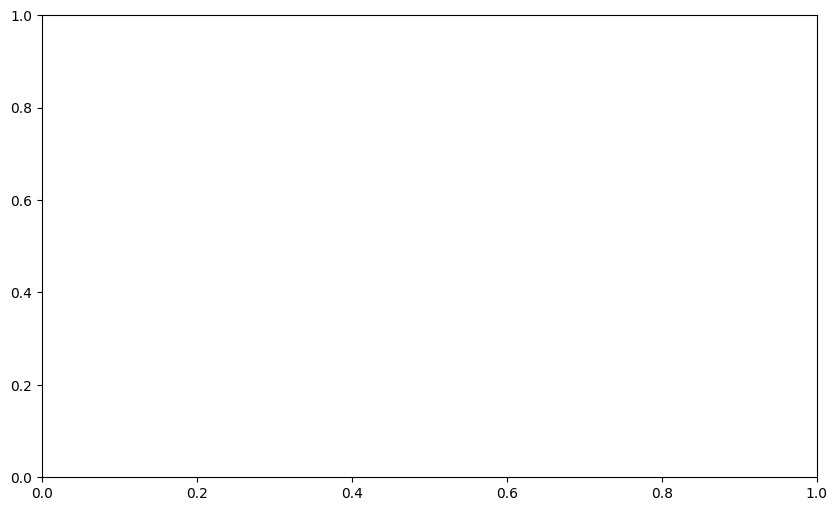

In [3]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

We now have kind of an empty plot. 

Please note, however, that we have used the "scripting layer" to produce these plots. I just wanted to show the idea of how the Artist objects work. In order to do so, we have used object-oriented style where we explicitly define instances of Artist objects. The other option is called `pyplot` style where we let `pyplot` create the `Figure` and `Axes` objects for us.




[]

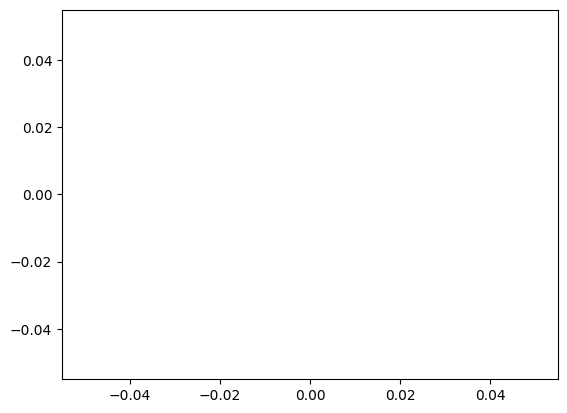

In [4]:
plt.plot()

## Scripting Layer

Finally, let's talk about the **scripting layer**. This layer is extremely important for us as data scientists in particular, and the one we will mostly deal with.

The scripting layer automates the process of putting everything together. As such, it is easier to use than the Artist layer. This layer helps simplify and speed up our interaction with the environment in order to build plots quickly. It does this, frankly, by doing a bunch of magic for us, and the difference between someone who is effective with matplotlib and someone who isn't, is usually based on their understanding of this magic of the scripting layer.

The scripting layer we use in this course is called [`pyplot`](https://matplotlib.org/api/pyplot_summary.html). As such, all of the functions which will run against the `pyplot` module will be considered a part of the scripting layer of the architecture. 

So to sum up our "matplotlib layer cake"... there's a backend, which sets up the environment of the actual drawing. A bunch of artists on top of the backend, which describe how data is arranged. Finally, a scripting layer, which actually creates those artists and choreographs them all together.

Now that we understand the architecture behind matplotlib, let's get our hands dirty and start plotting some graphs!

First, let's input the `pyplot` scripting layer as `plt`, and begin with a graph using matplotlib's `.plot()` function. 

*Note*: Another useful way to look at the function's documentation (other than hovering the mouse over it) is to add the `?` to the end. 


In [5]:
import matplotlib.pyplot as plt
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

Let's take a look at the `plot` function by looking at the `Docstring`.

If you're not used to seeing it, this Python function declaration with two arguments, the  `*args`, and the `**kwargs` can be a bit obscure. What's being said here by `*args` is that the function supports any number of *unnamed* arguments. The double star keyword args (`**kwargs`) also means that it supports any number of *named* arguments. This makes the function declaration very flexible since you can pass in basically any number of arguments, named or not, but it makes it difficult to know what is an appropriate argument. 

Reading on, we see that the arguments will be interpreted as x, y pairs. So let's try with just one data point at position 3,2.

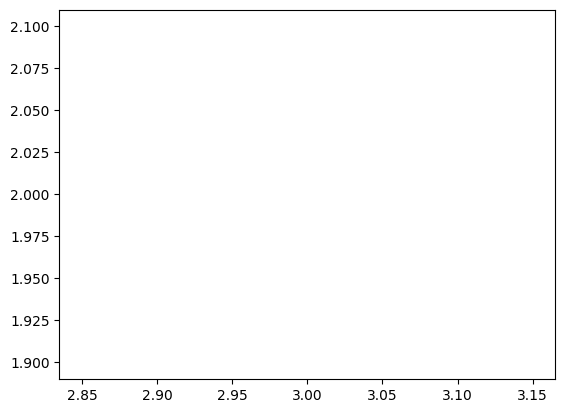

In [6]:
plt.plot(3, 2)

Here, we see that returns a `.Line2D` object as in the Docstring, and we see our first "inline" figure. 

We don't see the data points though, which is a bit odd. It turns out that the third argument should be a string which signifies how we want that data point to be rendered. In other words, this is because the default is the line style '-', so nothing will be shown if we only pass in one point (3,2).

Let's use a period (`'.'`) for a point marker, and we'll see that our data point shows up.

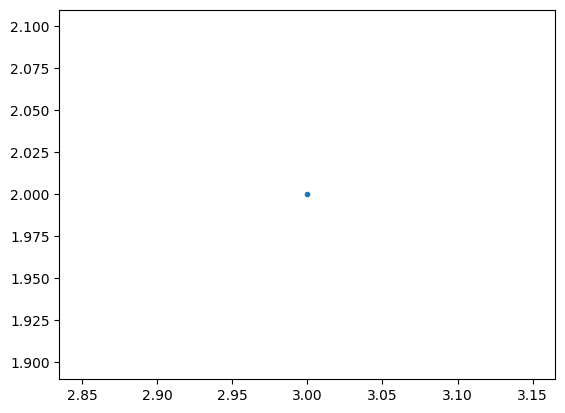

In [7]:
plt.plot(3, 2, '.')

Let's remember that this is all part of the scripting layer (`pyplot` that is), and there is always some behind the scenes work being done for us. For instance, when we make a call to `pyplot`'s `plt.plot()`, the scripting layer actually looks to see if there's a figure that currently exists, and if not, it creates a new one. It then returns the axes for this figure. We can actually get access to the figure using the `.gcf()` function, which stands for "get current figure" of `pyplot`, and get access to the axes as well using the `.gca()` function, "get current axes".
 
Let's create a new figure with `pyplot`. Then, let's make a plot, grab the axes, and set the x and y limits. We can do this using the `.axis()` function. This function takes four parameters: a minimum value for x which we'll put at zero, a maximum value for x which we'll put at six. Then, corresponding minimum and maximum values for y which we'll put at zero and 10.

(0.0, 6.0, 0.0, 10.0)

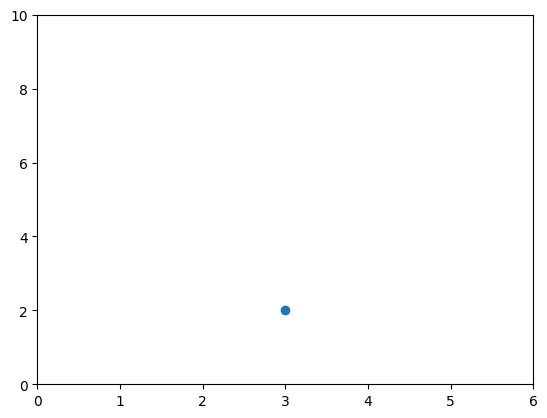

In [8]:
# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

All right, one more demonstration on the fundamentals of putting together a plot. You can add Artists to an axes object at any time. Pyplot does this for us when we call the `.plot()` function. It determines what shape we want from the string and the location associated with that shape, and then creates a patch object and addes it to the axes. 

As such, if we make subsequent calls to the plot function, this will add more data to our chart. You can see that when this is done, the points are rendered in different colors as the axes recognizes them as different data series. 

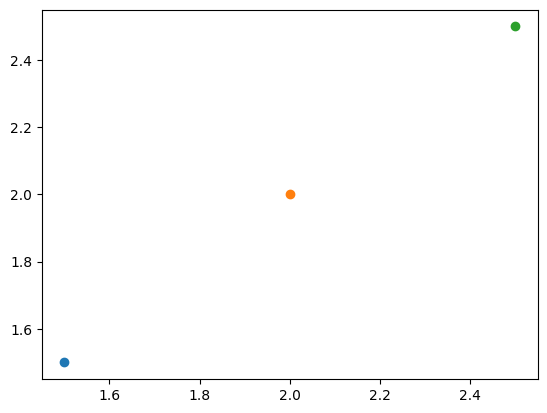

In [9]:
# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

But we can go further with the axes object to the point where we can actually get all of the "child objects" that that axes contains. We do this with the axes' `.get_children()` function. Here, we can see that there's actually three lines to the objects contained in this axes, these are our data points. A number of spines which are actual renderings of the borders of the frame including tick markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the axes.

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

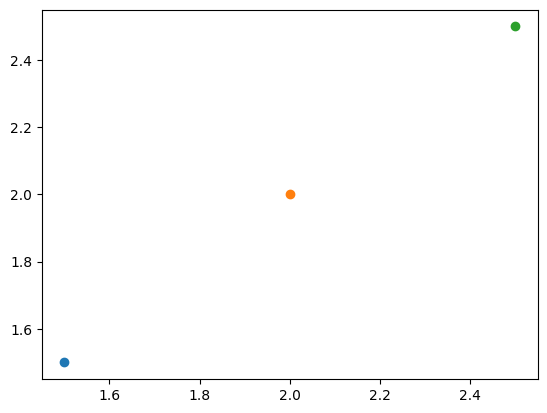

In [10]:
# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

Other than `.plot()`, matplotlib has a number of useful plotting methods in the scripting layer which correspond to different kinds of plots. We are not going to go through all of them in this course, but we'll touch on the three the major ones. 

Before we start, there are a few things to keep in mind:

1. `pyplot` will retrieve the current figure with the function `gcf()` and then get the current axis with the function `gca()`. While, `pyplot` is going to keep track of the axis objects for you, don't forget that they're there and you can get them whenever you want.

2. `pyplot` just mirrors the API of the `Axes` objects. So, while you are calling the `plot()` function against the `pyplot` module, you really are calling the `Axes` plot functions underneath, so be aware.

3. Finally, remember that the function declaration for most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments. During the course, we'll navigate through some of them to demostrate that *the matplotlib documentation is really key* in gaining a full understanding of the options available.

With that in mind let's move on to our first plot: scatterplots.

# Scatterplots

Let's start with a really simple scatterplot. We can create it using the [`.scatter()`](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function. 

For convenience, let's call the function's documentation:

In [11]:
plt.scatter?

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    *,
    edgecolors=None,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that

To create our scatter plot, let's create a short numpy array for x and repeat it to make y.

You can see in this plot a nice diagonal line and matplotlib has sized our axes accordingly.

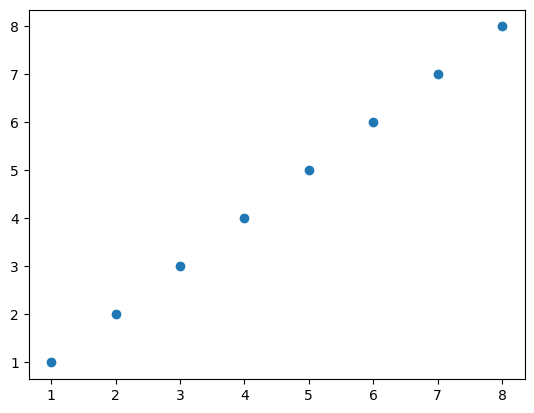

In [12]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

Say we want to increase the size of the markers, and highlight one using a different color. We can pass it a list of colors which correspond to each given point using the parameter `c`, and set the marker size as desired using `s`.

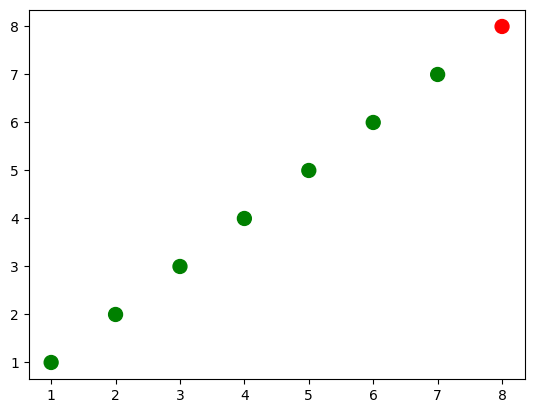

In [13]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

The conversion of data points into lists to be able to pass them as components is a pretty common pattern in matplotlib. 

You can have a dataset where each data point is represented with its own instance, which encapsulates all of its properties. For example, you could have the x value and a y value and a color and a size stored for each instance. 

This is where having some knowledge of list comprehensions and `lambda` comes in useful; as well as the `zip` function and list unpacking. Since this is so common in the Python data science world, I'm going to take a quick detour and touch base on that.

Storing point data as tuples is common and you should be familiar with being able to convert data to and from this form. If we want to turn the data into two lists, one for x parameter and one for the y parameter, we can use parameter unpacking with zip.

In [14]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]

x,y = list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10)))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


Now, let's get back to plotting.

Let's take these two lists (`x` and `y`) and plot them to a new figure using `.scatter()`. Instead of plotting them as one data series, we'll slice the lists and plot them as two data series. Note that we can color each series with a single value if we want to. 

Finally, we have the ability to label the data series, which will come in handy later when building a legend.

What about the axes labels? The axis are generally labeled to explain what they represent or the units that they describe. Charts also tend to have titles as well, and we should add that too. Since pyplot mirrors much of the axes API, we can make calls directly on pyplot. So let's do this using pyplot's [`.xlabel()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xlabel.html), [`.ylabel()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylabel.html), and [`.title()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html).

Let's add a legend as well, using [`.legend()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html). In the API, you'll see that there are a number of different parameters and one of them being `loc`, and putting its value at 4 will put the legend in the lower right corner of the graph. We could also get rid of the frame and add a title, and do any number of different transformations.

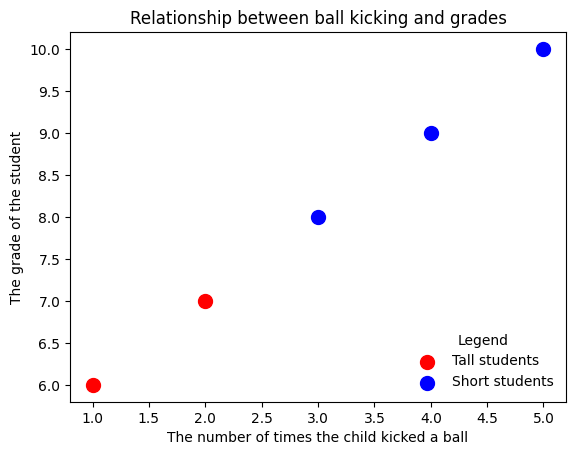

In [15]:
fig = plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

# add a legend (uses the labels from plt.scatter)
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')
plt.show()

Next, let's look at line plots 

# Line Plots

A line plot can be created with the `.plot()` function.

In [16]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

As shown in the Docstring, `.plot()` can plot a number of different series of data points, connecting each series in a point with a line. 

Let's start by using numpy to create a linear series of data points one through eight. Let's also create a number of quadratically increasing values as the second series. 

We can plot this, and this time I'll use the "mini formatting language task" in matplotlib, to draw lines between data points. We'll see the result as a two data series, the linear one at the bottom and the quadratic one at the top. Both are using dots because we use the `'-o'` flag.

So there are a couple of things which are new about this versus the scatter plots:

1. We only gave y-axes values to our plot call, no x axes values. The plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value, which is pretty handy when you want to make quick plots.

2. We see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.



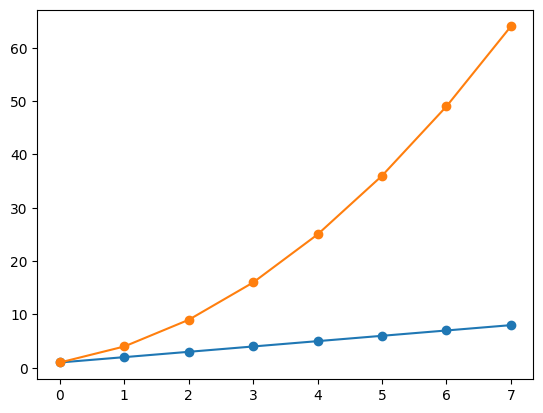

In [17]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

Let's recreate the same plot, and add a third series and make it red with dashed lines this time. Let's create x and y labels as well, with a title...

... and create a legend too. However, note that since we didn't label the data points as we did with the scatter plot, we need to create legend entries when we add the legend itself.

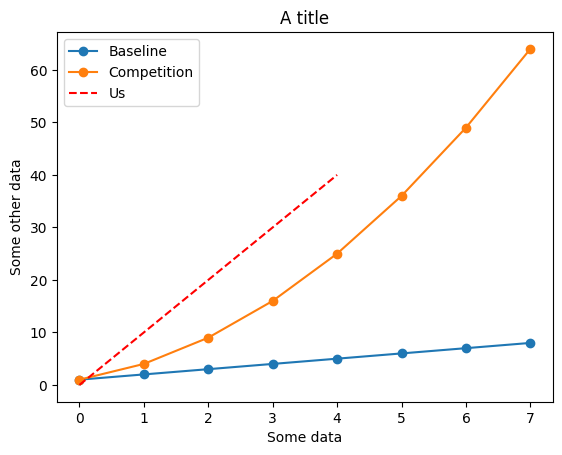

In [18]:
# plot another series with a dashed red line
plt.plot(linear_data, '-o', exponential_data, '-o', [0,10,20,30,40], 'r--')

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])


This is a good time to introduce the `.fill_between()` function of `matplotlib`. This function isn't specific to line plots, but you will see it commonly used with these plots, so I'll introduce it in this context.

In [19]:
plt.fill_between?

Signature:
plt.fill_between(
    x,
    y1,
    y2=0,
    where=None,
    interpolate=False,
    step=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*,
*y2*).  This creates one or multiple polygons describing the filled
area.

You may exclude some horizontal sections from filling using *where*.

By default, the edges connect the given points directly.  Use *step*
if the filling should be a step function, i.e. constant in between
*x*.

Parameters
----------
x : array (length N)
    The x coordinates of the nodes defining the curves.

y1 : array (length N) or scalar
    The y coordinates of the nodes defining the first curve.

y2 : array (length N) or scalar, default: 0
    The y coordinates of the nodes defining the second curve.

where : array of bool (length N), optional
    Define *where* to exclude some horizontal regions from being filled.
    The filled regions are defined

Let's imagine that we want to highlight the difference between the orange and the blue curves.

We could use the `.fill_between()` function to paint a color between these series. Since we didn't specify any x values in our call to `.plot()`, we'll just use the same range of data points it's already using. Then we'll put in our lower bounds and our upper bounds along with the color we want painted and for fun let's include a transparency value.

This is a great way to show, for instance, the standard deviation of results or error bars.

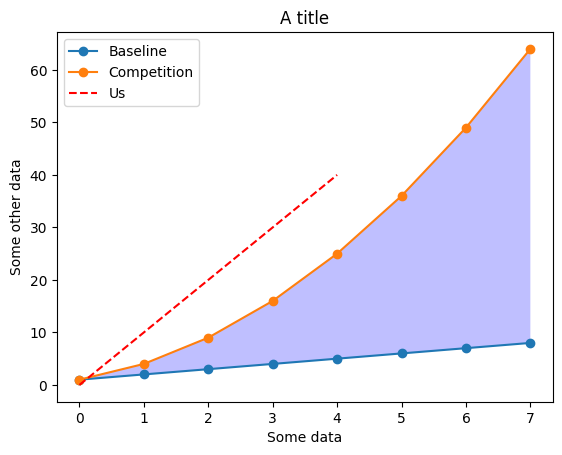

In [20]:
plt.plot(linear_data, '-o', exponential_data, '-o',[0,10,20,30,40], '--r')

plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])


# fill the area between the linear data and exponential data
plt.fill_between(range(len(linear_data)), 
                 linear_data, exponential_data, 
                 facecolor='blue', 
                 alpha=0.25)

Often with line plots the date or time forms are used on the x axes. Let's change our x axis to a series of eight date/time instances in one day intervals.

Let's first create a new image. Then use the NumPy `.arange()` function to generate an arrangement of dates at daily intervals. We can now replot our linear and exponential data against this set of dates.

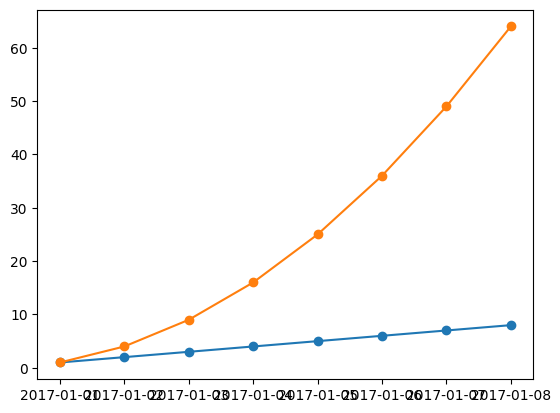

In [21]:
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

This produces a pretty decent looking figure with the data we want. But the dates overlap pretty heavily. Now, there's a couple of things that we could do here. For instance, every tick is in the year 2017, so we could iterate through and change the labels by stripping the year. We can then add an x-axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but the way I would solve it would be to call pyplot's [`.xticks()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks) function, and use the `rotation` parameter. 

(array([17167., 17168., 17169., 17170., 17171., 17172., 17173., 17174.]),
 [Text(17167.0, 0, '2017-01-01'),
  Text(17168.0, 0, '2017-01-02'),
  Text(17169.0, 0, '2017-01-03'),
  Text(17170.0, 0, '2017-01-04'),
  Text(17171.0, 0, '2017-01-05'),
  Text(17172.0, 0, '2017-01-06'),
  Text(17173.0, 0, '2017-01-07'),
  Text(17174.0, 0, '2017-01-08')])

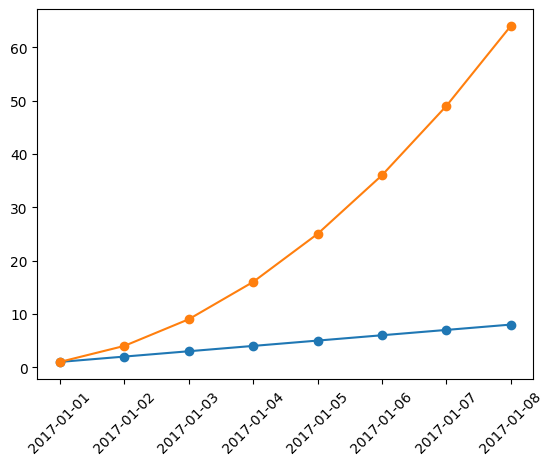

In [22]:
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

plt.xticks(rotation=45)

Another slightly more complex way to get the same result is to use the x-axis or y-axis properties of the Axes object which we can get with `.gca()`. There are lots of interesting properties of the [Axes object](https://matplotlib.org/3.1.1/api/axes_api.html#ticks-and-tick-labels). For instance; you can get the grid lines, the tick locations for both major and minor ticks, and so on.

What I want to show you though, is that you can access the text of the ticks using the `.get_ticklabels()` function. Each of the tick labels is a Text object which itself is an Artist object. This means that you can use a number of different Artist functions.

One specific to Text is the `.set_rotation()` function which changes the rotation based on degrees. By iterating through the axis labels, you can change that.

In [23]:
#fig.gca().get_children()

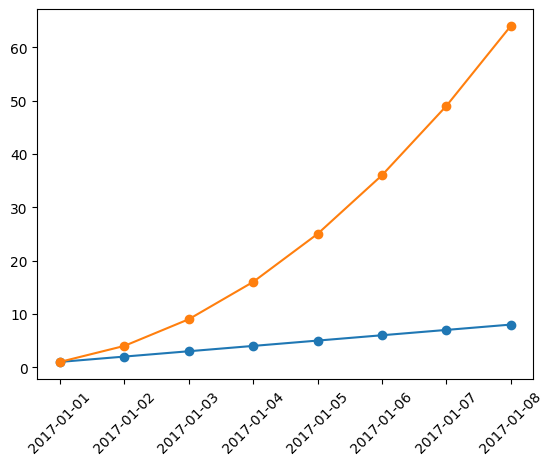

In [24]:
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

While in this particular example, the previous method seems to be an easier way to rotate the labels, knowing how to navigate through the Artist and Axes objects gives you more flexibility to customize your plots.


# Bar Charts

Matplotlib has support for several kinds of bar charts. The most general case being sending in a parameter of the x components and a parameter of the height of the bars. Let's do this with our linear data in regards to height, and for the x axis, let's just create a list of values as long as our linear data list.

We pass both variables to the [`.bar()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) function. Let's also pass in the width of the bar as 0.3, using the `width` parameter.

<BarContainer object of 8 artists>

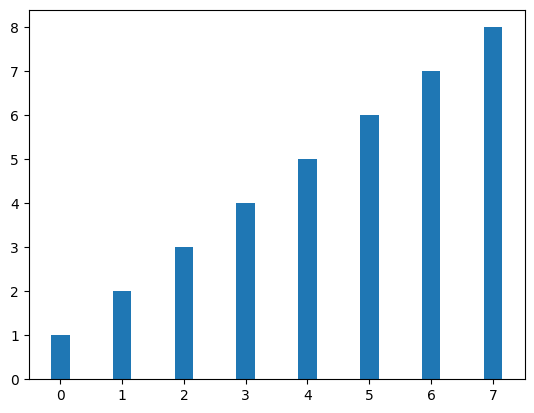

In [25]:
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

To add a second bar, we can simply call the `.bar()` function again but with new data, keeping in mind that we need to adjust the x component values to make up for the first bar we plotted.

Let's use the `color` parameter to give it a distinct red color.

<BarContainer object of 8 artists>

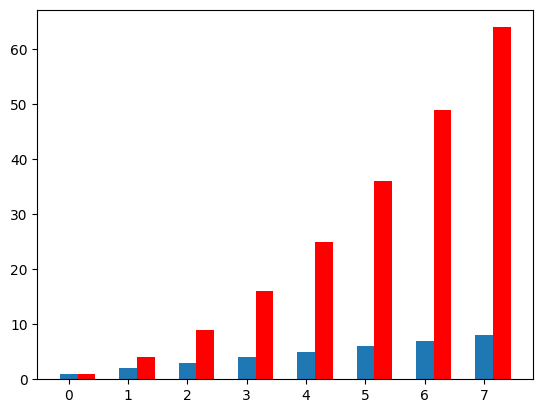

In [26]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(xvals, linear_data, width = 0.3)
plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

One of the nice features of the bar function is that you can add error bars to each bar as well, using the y-error parameter, `yerr`.

For example, each of our pieces of data in the linear data might actually be a mean value, computed from many different observations. So, theoretically we could just create a list of error values. For convenience, let's import the random function, `randint` to generate some random integers, and then use a list comprehension to generate this new list. We can then just call `plt.bar()` again, and pass the new list to the `yerr` parameter.

<BarContainer object of 8 artists>

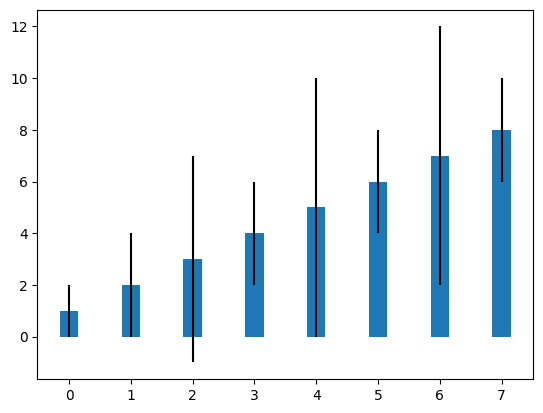

In [27]:
from random import randint
linear_err = [randint(0,5) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

We can also do stacked bar charts as well. For instance, if we wanted to show cumulative values while also keeping the series independent, we could do this by setting the `bottom` parameter in our second plot to be equal to the series we previously plotted.

<BarContainer object of 8 artists>

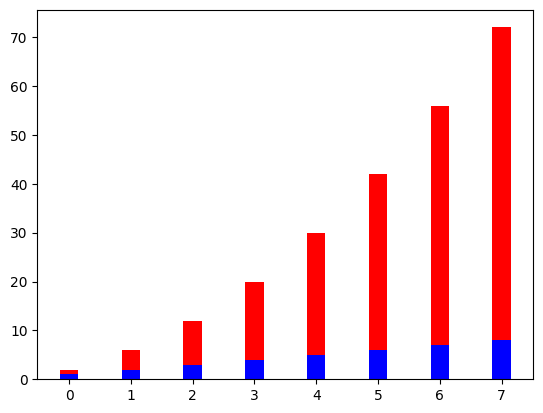

In [28]:
# stacked bar charts are also possible
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

Finally, we can pivot this bar graph into a horizontal bar graph by calling the `.barh()` function instead.
Note, however, that we have to change the `bottom` parameter to `left` and the `width` to `height`.

<BarContainer object of 8 artists>

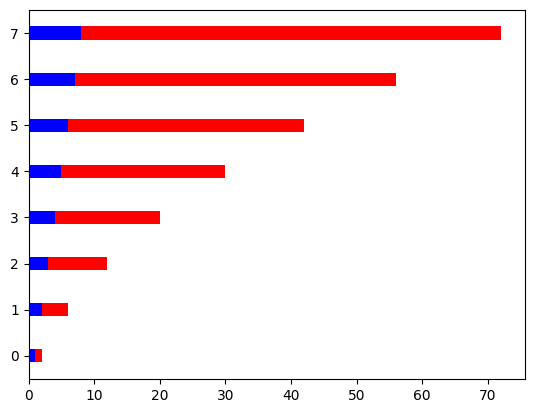

In [29]:
# or use barh for horizontal bar charts
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')

So those are the basics of charting and plotting in Matplotlib. I think it's important to realize that there really isn't any magic. The scripting layer is really a set of convenience functions on top of the object layer.

Some people share a preference for one or the other, but at the core, they manipulate the same data elements. Do not think of them as being opposed to one another or duplicative. Instead, consider them as working together, and being able to move back and forth between them is really important.

We've talked about some fundamental charts in this module: scatter plots, line graphs, and bar charts. There are more, which we'll dig into in the next lecture. 